In [1]:
from scipy import misc
import matplotlib.pyplot as plt
import numpy as np
import scipy

%matplotlib inline

In [2]:
face = misc.face(gray=True)  # retrieve a grayscale image
#misc.imsave('face-gray.png', f)

In [3]:
#face = misc.imread('face-gray.png')
print type(face)
print face.shape, face.dtype

<type 'numpy.ndarray'>
(768, 1024) uint8


In [4]:
#ascent = misc.ascent()

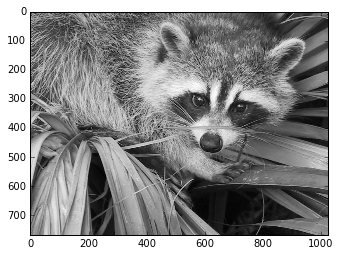

In [5]:
plt.imshow(face, cmap=plt.cm.gray)
plt.show()

In [6]:
face.shape

(768, 1024)

In [7]:
f = np.fft.fft2(face)

In [8]:
f.shape

(768, 1024)

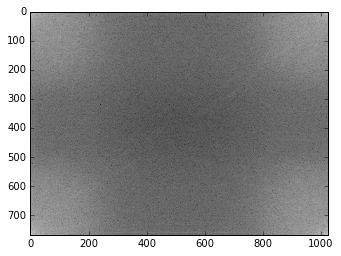

In [9]:
plt.imshow(np.log(np.abs(f)), cmap=plt.cm.gray)

### Shift the zero-frequency component to the center of the spectrum.

In [10]:
fshift = np.fft.fftshift(f)

mag = np.abs(fshift)
phase = np.angle(fshift)
real = fshift.real
imag = fshift.imag

In [11]:
mag, phase, real, imag

(array([[ 1162.        ,   651.39240202,   487.25844646, ...,
           782.62521879,   487.25844646,   651.39240202],
        [  942.1142327 ,   296.44323221,   750.76749806, ...,
           515.44964349,   103.21261236,   579.93414058],
        [  487.77275779,   729.6215266 ,   457.68373773, ...,
           331.24949459,   188.60592266,   906.9741111 ],
        ..., 
        [ 1596.95253106,  1181.70995229,   262.317143  , ...,
           367.29630563,   462.80498175,  1171.81699207],
        [  487.77275779,   906.9741111 ,   188.60592266, ...,
           125.12047626,   457.68373773,   729.6215266 ],
        [  942.1142327 ,   579.93414058,   103.21261236, ...,
           473.86629623,   750.76749806,   296.44323221]]),
 array([[ 3.14159265, -2.78647429,  1.72128212, ..., -0.75025866,
         -1.72128212,  2.78647429],
        [-0.31967279,  0.42002519, -2.65788016, ..., -2.77292101,
         -2.71265845,  1.5280005 ],
        [ 1.94435016,  1.69592257,  1.97585657, ...,  1.0403

### Magnitude and Phase only

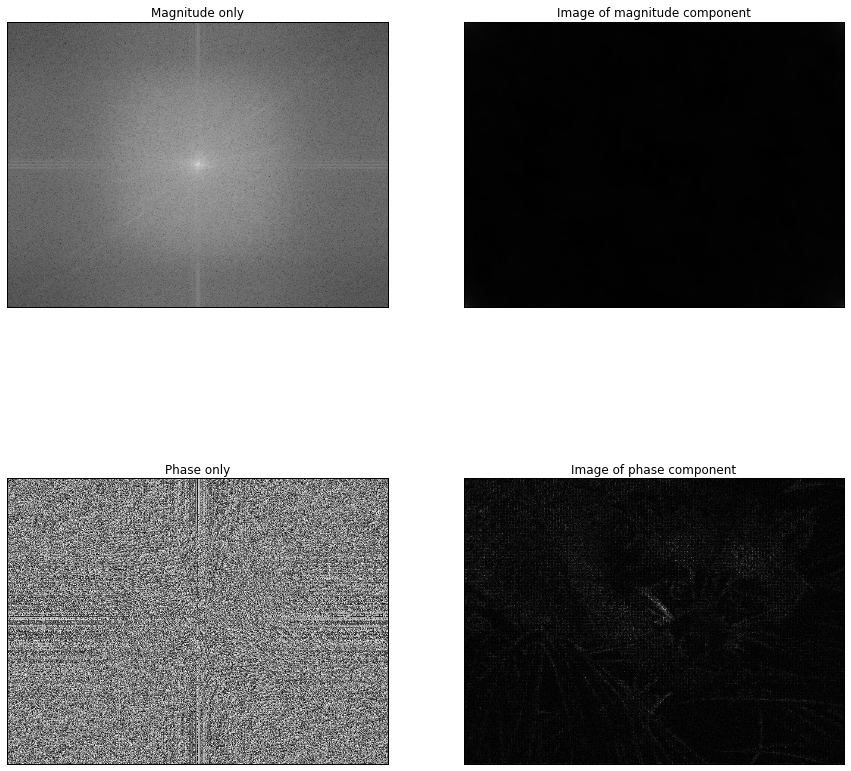

In [26]:
mag_ishift = np.fft.ifftshift(mag)
phase_ishift = np.fft.ifftshift(phase)

mag_img = np.fft.ifft2(mag_ishift*np.exp(1j*0.0))
phase_img = np.fft.ifft2(10.0*np.exp(1j*(phase_ishift)))

mag_img = np.abs(mag_img)
phase_img = np.abs(phase_img)

plt.figure(figsize=(15,15))

plt.subplot(221)
plt.imshow(np.log(mag), cmap = 'gray')
plt.title('Magnitude only')
plt.xticks([]), plt.yticks([])

plt.subplot(222)
plt.imshow(mag_img, cmap = 'gray')
plt.title('Image of magnitude component')
plt.xticks([]), plt.yticks([])

plt.subplot(223)
plt.imshow(phase, cmap = 'gray')
plt.title('Phase only')
plt.xticks([]), plt.yticks([])

plt.subplot(224)
plt.imshow(phase_img, cmap = 'gray')
plt.title('Image of phase component')
plt.xticks([]), plt.yticks([])

plt.show()

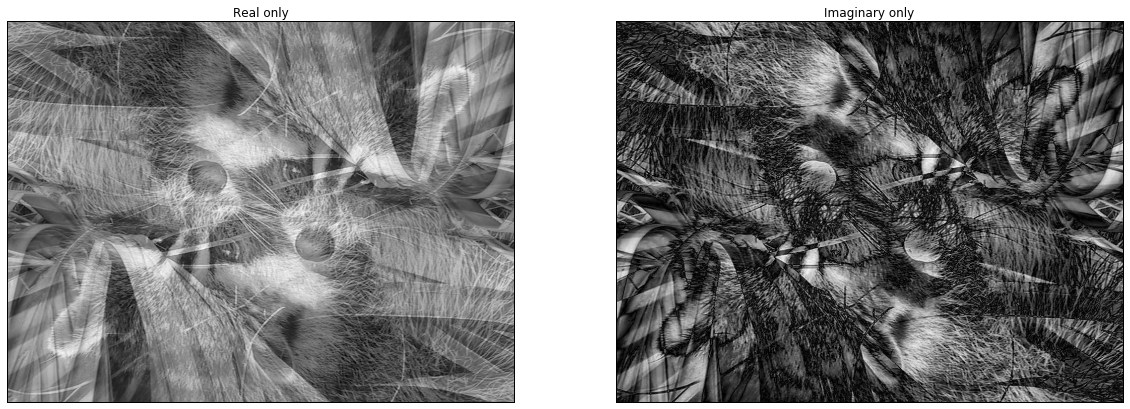

In [13]:
f_ishift = np.fft.ifftshift(real)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.figure(figsize=(20,20))

plt.subplot(121)
plt.imshow(img_back, cmap = 'gray')
plt.title('Real only')
plt.xticks([]), plt.yticks([])


f_ishift = np.fft.ifftshift(imag)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.subplot(122)
plt.imshow(img_back, cmap = 'gray')
plt.title('Imaginary only')
plt.xticks([]), plt.yticks([])

plt.show()

### Filtering

#### High pass filtering (removing low freq or extended feature)

/home/ridlo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:22: RuntimeWarning: divide by zero encountered in log


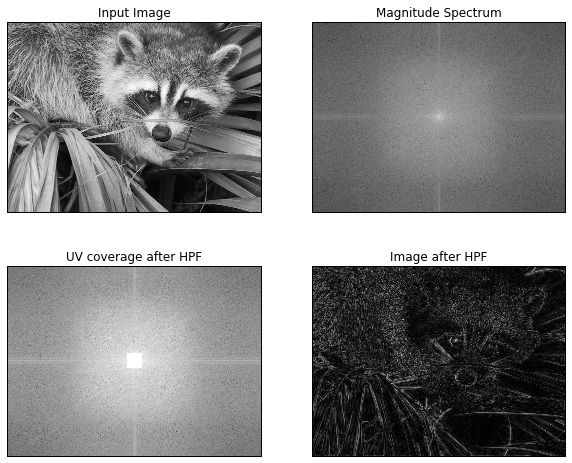

In [15]:
plt.figure(figsize=(10,8))

plt.subplot(221)
plt.imshow(face, cmap = 'gray')
plt.title('Input Image')
plt.xticks([]), plt.yticks([])

plt.subplot(222)
plt.imshow(np.log(mag), cmap = 'gray')
plt.title('Magnitude Spectrum')
plt.xticks([]), plt.yticks([])

rows, cols = face.shape
crow,ccol = rows/2 , cols/2
hpf = fshift.copy()
hpf[crow-30:crow+30, ccol-30:ccol+30] = 0
f_ishift = np.fft.ifftshift(hpf)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.subplot(223)
plt.imshow(np.log(np.abs(hpf)), cmap = 'gray')
plt.title('UV coverage after HPF')
plt.xticks([]), plt.yticks([])

plt.subplot(224)
plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF') 
plt.xticks([]), plt.yticks([])

plt.show()

#### Low pass filtering (removing high freq or detail structure)

/home/ridlo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:25: RuntimeWarning: divide by zero encountered in log


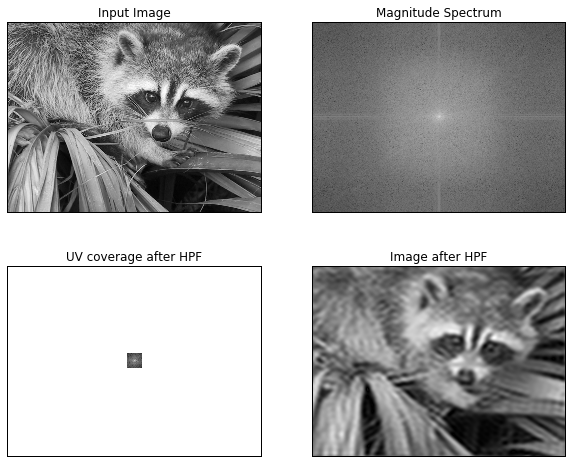

In [17]:
plt.figure(figsize=(10,8))

plt.subplot(221)
plt.imshow(face, cmap = 'gray')
plt.title('Input Image')
plt.xticks([]), plt.yticks([])

plt.subplot(222)
plt.imshow(np.log(mag), cmap = 'gray')
plt.title('Magnitude Spectrum')
plt.xticks([]), plt.yticks([])

rows, cols = face.shape
crow,ccol = rows/2 , cols/2
lpf = fshift.copy()
lpf[:crow-30, :] = 0
lpf[crow+30:, :] = 0
lpf[:, :ccol-30] = 0
lpf[:, ccol+30:] = 0
f_ishift = np.fft.ifftshift(lpf)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.subplot(223)
plt.imshow(np.log(np.abs(lpf)), cmap = 'gray')
plt.title('UV coverage after HPF')
plt.xticks([]), plt.yticks([])

plt.subplot(224)
plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF') 
plt.xticks([]), plt.yticks([])

plt.show()